In [33]:
import pandas as pd
import numpy as np
import tqdm
from tqdm import tqdm, tqdm_notebook 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
feat_df = pd.read_csv('./data/AZDIAS_Feature_Summary_r003.csv')

In [4]:
feat_df.sample(10)

,Attribute,Description,Value,Meaning
1504,KBA13_KW_110,share of cars with an engine power between 91 ...,1,very low
1166,KBA13_CCM_1200,share of cars with 1000ccm to 1199ccm within t...,3,average
655,D19_VOLLSORTIMENT_RZ,transactional activity based on the product gr...,4,Multi-/Doublebuyer 13-24 months
1226,KBA13_CCM_3000,share of cars with 2500ccm to 2999ccm within t...,3,average
517,D19_TELKO_DATUM,actuality of the last transaction for the segm...,6,activity elder than 1 year
1711,KBA13_VW,share of VOLKSWAGEN within the PLZ8,1,very low
1130,KBA13_BJ_2004,share of cars built before 2004 within the PLZ8,3,average
830,KBA05_CCM2,share of cars with 1400ccm to 1799 ccm,4,high
1184,KBA13_CCM_1500,share of cars with 1400ccm to 1499ccm within t...,3,average
1702,KBA13_VORB_2,share of cars with 2 preowner - PLZ8,4,high


### SPECIAL ATTRIBUTES
> CATEGORICAL
1. CAMEO_DEU_2015
2. OST_WEST_KZ

> Number ranges
1. GEBURTSJAHR	year of birth
2. KBA13_ANZAHL_PKW	number of cars in the PLZ8
3. MIN_GEBAEUDEJAHR	year the building was first mentioned in our database
4. MIN_GEBAEUDEJAHR



In [15]:
cat_feats = ['CAMEO_DEU_2015','OST_WEST_KZ']
range_feats = ['GEBURTSJAHR','KBA13_ANZAHL_PKW','MIN_GEBAEUDEJAHR','MIN_GEBAEUDEJAHR']

feats = list(set(feat_df['Attribute']))
num_feats = [feat for feat in feats if feat not in cat_feats+range_feats]

all_feats = cat_feats + range_feats + num_feats
special_feats = cat_feats + range_feats

len(cat_feats),len(range_feats),len(num_feats),len(all_feats)

(2, 4, 309, 315)

### Data Exploration

In [7]:
#General population dataset
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';', low_memory=False)
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0


In [8]:
#Does the features match the feature set?
azdias_feat = list(azdias.columns)
len(all_feats),len(azdias_feat)

(315, 366)

In [9]:
#Subset azdias for features within all_feats
cols = [ col for col in azdias_feat if col in all_feats]
cols = ['LNR'] + cols
len(cols)

272

Check if the special attributes are within the azdias dataset

In [13]:
[cat for cat in cat_feats if cat in cols]

['CAMEO_DEU_2015', 'OST_WEST_KZ']

In [14]:
[cat for cat in range_feats if cat in cols]

['GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR', 'MIN_GEBAEUDEJAHR']

In [18]:
azdias[special_feats].describe()

,GEBURTSJAHR,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,MIN_GEBAEUDEJAHR
count,638399.000000,562269.000000,571295.000000,571295.000000
mean,1099.619058,620.825555,1993.261991,1993.261991
std,976.769495,340.280500,3.310260,3.310260
min,0.000000,0.000000,1985.000000,1985.000000
25%,0.000000,385.000000,1992.000000,1992.000000
50%,1943.000000,550.000000,1992.000000,1992.000000
75%,1970.000000,779.000000,1993.000000,1993.000000
max,2017.000000,2300.000000,2016.000000,2016.000000


In [21]:
azdias[cat_feats].apply(pd.Series.value_counts)

,CAMEO_DEU_2015,OST_WEST_KZ
1A,7840.0,NaN
1B,2952.0,NaN
1C,3093.0,NaN
1D,8658.0,NaN
1E,3648.0,NaN
2A,9466.0,NaN
2B,11069.0,NaN
2C,13961.0,NaN
2D,24992.0,NaN
3A,7535.0,NaN


In [22]:
#Remove the columns from azdias that are not part of the attributes. However we keep the LNR identification code
azdias_subset = azdias[cols]
azdias_subset.head()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CJT_GESAMTTYP,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,0.0,11.0,0.0,2.0,0.0,6.0,8A,5.0,...,1.0,3.0,0.0,2.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,17.0,10.0,0.0,1.0,0.0,2.0,4C,3.0,...,4.0,2.0,0.0,1.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,13.0,1.0,0.0,0.0,0.0,4.0,2A,2.0,...,4.0,1.0,0.0,1.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,20.0,3.0,0.0,4.0,0.0,2.0,6B,5.0,...,7.0,2.0,0.0,2.0,2.0,9.0,3.0,4.0,1.0,3.0


In [23]:
azdias_subset.describe()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,6.384000e+05,638400.000000,585268.000000,571296.000000,568610.000000,585268.000000,585268.000000,570888.000000,634886.000000,638400.000000,...,638399.000000,638399.000000,585267.000000,638399.000000,561041.000000,585267.000000,571295.000000,638399.000000,638399.000000,638399.000000
mean,6.363359e+05,-0.359095,10.867592,8.274942,0.040270,1.728922,0.004174,4.152935,3.634945,0.122556,...,4.019059,1.265317,0.003472,1.196562,3.932488,7.912491,4.050562,3.360474,1.522386,2.777243
std,2.559900e+05,1.198446,7.640901,15.588029,0.317091,1.155030,0.068980,2.182518,1.594910,0.536674,...,2.077772,1.288642,0.084419,0.954331,1.964238,1.921875,1.948764,1.352654,0.499499,1.068566
min,1.918920e+05,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.150045e+05,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.326405e+05,-1.000000,13.000000,4.000000,0.000000,1.000000,0.000000,5.000000,4.000000,0.000000,...,4.000000,1.000000,0.000000,1.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.581982e+05,-1.000000,17.000000,9.000000,0.000000,2.000000,0.000000,6.000000,5.000000,0.000000,...,6.000000,2.000000,0.000000,2.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,21.000000,595.000000,23.000000,45.000000,6.000000,7.000000,6.000000,6.000000,...,7.000000,3.000000,5.000000,2.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [24]:
azdias_subset.shape

(638400, 272)

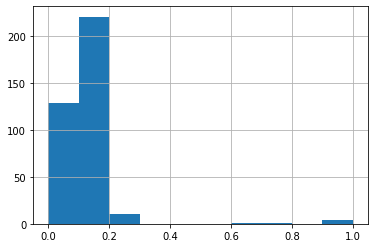

In [45]:
#figure out the nan per column
nans = azdias.isna().sum().sort_values()
nans_df = pd.DataFrame()
nans_df['attr'] = list(nans.index)
nans_df['nan_count'] = list(nans.values)
len_df = azdias.shape[0]
nans_df['pct_nan'] = [float(count)/len_df for count in nans_df['nan_count']]
nans_df['pct_nan'].hist()

Most of the numerical and categorical values are are under 15% NAN. We now need to check how many of them are not within the attributes given values

The are the no attribute values that are outside of the attribute value set! Lets export a clean_azdias_subset.csv

### CLEAN AZDIAS + FILLNAS

In [30]:
#FILLNA CATEGORICAL FEATS
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cat in tqdm(cat_feats):
    azdias_subset[cat] = azdias_subset[cat].fillna('Unknown') 
    
    temp_list = []
    temp_df = feat_df[feat_df['Attribute'] == cat]
    values = [str(val) for val in temp_df['Value']]
    
    for val in azdias_subset[cat]:
        try:
            val = str(val)
            if val in values:
                temp_list.append(val)
            else:
                temp_list.append('Unknown')
        except:
            temp_list.append('Unknown')
            
    azdias_subset[str(cat)] = temp_list
    azdias_subset[str(cat)] = le.fit_transform(azdias_subset[cat])

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [31]:
azdias_subset[cat_feats].apply(pd.Series.value_counts)

,CAMEO_DEU_2015,OST_WEST_KZ
0,7840,117959.0
1,2952,67105.0
2,3093,453336.0
3,8658,NaN
4,3648,NaN
5,9466,NaN
6,11069,NaN
7,13961,NaN
8,24992,NaN
9,7535,NaN


In [40]:
#FILLNA NUMERICAL FEATS
azdias_num_feats = [col for col in cols if col in num_feats]

for cat in tqdm(azdias_num_feats):
    temp_list = []
    temp_df = feat_df[feat_df['Attribute'] == cat]
    values = [int(val) for val in temp_df['Value']]
    
    for val in azdias_subset[cat]:
        try:
            val = int(val)
            if val in values:
                temp_list.append(val)
            else:
                temp_list.append(np.NaN)
        except:
            temp_list.append(np.NaN)
    azdias_subset[str(cat)] = temp_list

  0%|                                                                                          | 0/266 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|████████████████████████████████████████████████████████████████████████████████| 266/266 [02:11<00:00,  2.04it/s]


In [41]:
#FILLNA RANGE FEATS
for feat in tqdm(range_feats):
    temp_list = []
    for val in azdias_subset[feat]:
        try:
            val = int(val)
            temp_list.append(val)
        except:
            temp_list.append(np.NaN)
    azdias_subset[feat] = temp_list

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.28it/s]


In [42]:
azdias_subset = azdias_subset.fillna(azdias_subset.mean())

Check is all NAs were filled

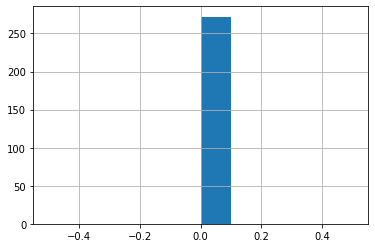

In [46]:
#figure out the nan per column
nans = azdias_subset.isna().sum().sort_values()
nans_df = pd.DataFrame()
nans_df['attr'] = list(nans.index)
nans_df['nan_count'] = list(nans.values)
len_df = azdias_subset.shape[0]
nans_df['pct_nan'] = [float(count)/len_df for count in nans_df['nan_count']]
nans_df['pct_nan'].hist()

In [47]:
nans_df['pct_nan'].value_counts()

0.0    272
Name: pct_nan, dtype: int64

In [43]:
azdias_subset.to_csv('./data/cleaned/azdias_subset.csv',index=False)